**Customer Sentiment Analysis and Booking Prediction for British Airways**

In this project, I analyzed customer feedback and predict booking completion for British Airways towards developing a proactive customer acquisition strategy. I scraped customer reviews from a third-party website, performed NLP and topic modeling to extract themes and sentiments, visualized the results and cleaned the data for further exploration and applied machine learning to identify the factors that influence successful bookings.

In [1]:
#import relevant libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

Utilizing web scraping techniques with the BeautifulSoup library, I collected customer reviews from a third-party website. This process involved paginated data retrieval, resulting in a dataset of textual feedback of British Airways for subsequent analysis.

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
#morph reviews into dataframe
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Extremely rude ground service....
1,✅ Trip Verified | My son and I flew to Geneva...
2,✅ Trip Verified | For the price paid (bought ...
3,✅ Trip Verified | Flight left on time and arr...
4,✅ Trip Verified | Very Poor Business class pr...


In [4]:
#save data to csv file
df.to_csv("BA_reviews.csv")

Used the NLTK library of Natural Language Processing (NLP) to preprocess the textual data by cleaning, removing stopwords, and lemmatizing the text.

In [5]:
##Import necessary libraries
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
# load the saved CSV file into a Pandas dataframe
df3 = pd.read_csv('BA_reviews.csv')

# Clean the data (preprocessing)
stop_words = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = " ".join([word for word in text.lower().split() if word not in stop_words])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

df3['BA_cleaned_reviews'] = df3['reviews'].apply(clean)

Employed Latent Dirichlet Allocation (LDA) for topic modeling to uncover prevalent themes within the customer reviews, and also used TextBlob for sentiment analysis to gain insights into the overall sentiment of the reviews, classifying them as positive, neutral, or negative.


In [7]:
# Topic Modelling using Latent Dirichlet Allocation (LDA)
vectorizer = CountVectorizer(analyzer='word',
                             min_df=10,
                             stop_words='english',
                             lowercase=True,
                             token_pattern='[a-zA-Z0-9]{3,}')
data_vectorized = vectorizer.fit_transform(df3['BA_cleaned_reviews'])

lda_model = LatentDirichletAllocation(n_components=10,
                                      max_iter=10,
                                      learning_method='online',
                                      random_state=100,
                                      batch_size=128,
                                      evaluate_every = -1,
                                      n_jobs = -1,
                                      )
lda_output = lda_model.fit_transform(data_vectorized)

In [8]:
# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df3['sentiment'] = df3['BA_cleaned_reviews'].apply(get_sentiment)

Visualised the results of topic modeling and sentiment analysis by creating a scatter plot to illustrate word importance, a histogram to visualise sentiment distribution, and a word cloud to show frequently used terms in the review.

In [9]:
# Word Cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(df3['BA_cleaned_reviews']))

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


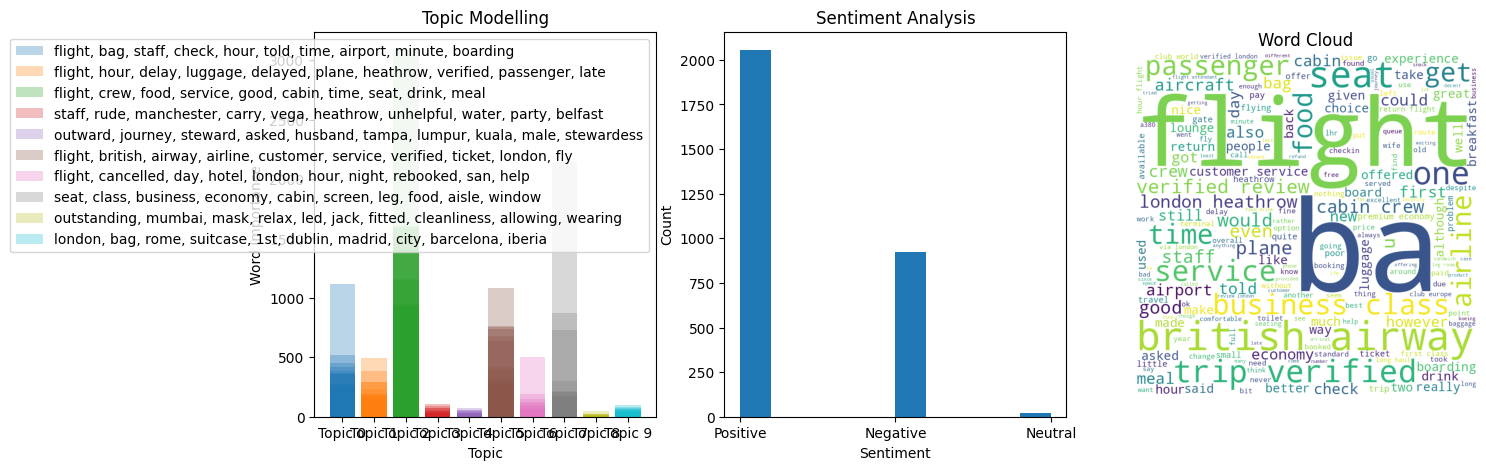

In [10]:
# Assuming you have 10 topics in your LDA model
num_topics = 10

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic
top_words = [', '.join([feature_names[i] for i in topic.argsort()[:-11:-1]]) for topic in lda_model.components_]


# plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title('Topic Modelling')

# Plot bar plots for each topic
for i, top_words_str in enumerate(top_words):
    axs[0].bar(f'Topic {i}', lda_model.components_[i], alpha=0.3, label=top_words_str)

axs[0].set_xlabel('Topic')
axs[0].set_ylabel('Word Importance')
axs[0].legend()

axs[1].set_title('Sentiment Analysis')
axs[1].hist(df3['sentiment'])
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Count')

axs[2].set_title('Word Cloud')
axs[2].imshow(wordcloud)
axs[2].axis('off')

plt.show()


For a high-quality predictive model, the training data must be of high quality. A dataset of completed booking requests was read-in, manipulated and utilised for the predictive model.

In [11]:
#Display to inspect the content of the data
flight = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/customer_booking .csv", encoding="ISO-8859-1")
flight.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


To provide more context, below is a more detailed data description, explaining exactly what each column of variable means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

The data was cleaned, categorical variables were encoded, and values were mapped. Also, exploratory data analysis was performed to understand the data structure and characteristics.

In [12]:
#Dataset Overview and Structure
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [13]:
#Statistical Summary of the Flight Dataset
flight.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [14]:
#Exploring Categorical Variables in the Dataset
flight["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [15]:
flight["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [16]:
flight["booking_complete"].unique()

array([0, 1])

In [17]:
flight["route"].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [18]:
# convert numerical columns to categorical
flight['booking_complete'] = flight['booking_complete'].astype('category')

In [19]:
#Encoding Categorical Variable for the predictive model
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
flight['sales_channel'] = le.fit_transform(flight['sales_channel'])
le = LabelEncoder()
flight['trip_type'] = le.fit_transform(flight['trip_type'])
le = LabelEncoder()
flight['booking_complete'] = le.fit_transform(flight['booking_complete'])

In [20]:
# count the unique values in route
unique_count_route = flight['route'].nunique()

# print the result
print(unique_count_route)

799


In [21]:
#mapping of the flight route
mapping_route = {}
unique_route = flight['route'].unique()

for i, value in enumerate(unique_route):
    mapping_route[value] = i+1

flight['route'] = flight['route'].map(mapping_route)

In [22]:
#Explore booking origin
flight["booking_origin"].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [23]:
# count the unique values in Booking origin
unique_count_origin = flight['booking_origin'].nunique()

# print the result
print(unique_count_origin)

104


In [24]:
#mapping of booking origin
mapping_Booking_origin = {}
unique_origin = flight['booking_origin'].unique()

for i, value in enumerate(unique_origin):
    mapping_Booking_origin[value] = i+1

flight['booking_origin'] = flight['booking_origin'].map(mapping_Booking_origin)

In [25]:
#Explore the flight days
flight["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [26]:
#mapping of flight day
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

flight["flight_day"] = flight["flight_day"].map(mapping)

In [27]:
#Explore Completed Bookings
flight.value_counts('booking_complete')

booking_complete
0    42522
1     7478
dtype: int64

RandomForestClassifier was used to predict booking completion. Accuracy in forecasting prediction was achieved to know if a customer would complete a booking or not, and also gained insights into the factors that affect booking success.

In [28]:
from sklearn.impute import SimpleImputer
# Remove rows with missing values
flight.dropna(inplace=True)

# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X = flight.drop('booking_complete', axis=1)
y = flight['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Save the cleaned dataset
flight.to_csv('cleaned_flight.csv', index=False)


In [29]:
# Check for missing values to verify cleaned Data
missing_values = flight.isnull()
print(missing_values)

# Get a count of missing values in each column
missing_values_count = flight.isnull().sum()
print(missing_values_count)

       num_passengers  sales_channel  trip_type  purchase_lead  \
0               False          False      False          False   
1               False          False      False          False   
2               False          False      False          False   
3               False          False      False          False   
4               False          False      False          False   
...               ...            ...        ...            ...   
49995           False          False      False          False   
49996           False          False      False          False   
49997           False          False      False          False   
49998           False          False      False          False   
49999           False          False      False          False   

       length_of_stay  flight_hour  flight_day  route  booking_origin  \
0               False        False       False  False           False   
1               False        False       False  False        

In [30]:
# Print the shapes of the training and testing sets to verify that they are equally represented
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (35000, 13)
Testing set shape:  (15000, 13)


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest classifier
rf = RandomForestClassifier()

# Train model on training data
rf.fit(X_train, y_train)

# Make predictions on testing data
flight_pred = rf.predict(X_test)

# Evaluate model performance
accuracy = rf.score(X_test, y_test)
print(accuracy)

0.8533333333333334


Feature importances of the RandomForestClassifier was plotted to reveal the top variables that influence booking completion.

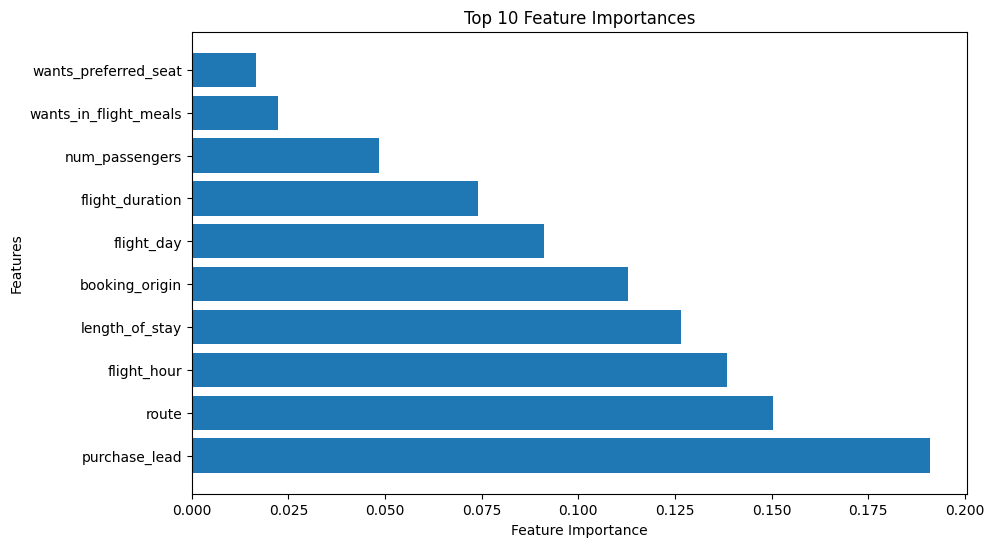

In [32]:
# Get feature importances
feature_importances = rf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Select top n features to plot (change the value of n as per your preference)
n = 10
top_n_indices = sorted_indices[:n]
top_n_features = feature_names[top_n_indices]
top_n_importances = feature_importances[top_n_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(n), top_n_importances, align='center')
plt.yticks(range(n), top_n_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top {} Feature Importances'.format(n))
plt.show()

In [ ]:
!pip3 install nbconvert
!jupyter nbconvert --to html British_Airways.ipynb